In [31]:
import os
import json
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dotenv import load_dotenv

In [32]:
# helper functions
def get_key():
    "Get the API key from an .env file"
    if ".env" not in os.listdir("../"):
        print("Configuring API Key...")
        key = input("Amberdata API Key: ")
        with open("../.env", "w") as f:
            f.write(f"AMBERDATA_API_KEY={key}\n")
    load_dotenv(verbose=True)
    return {
        "AMBERDATA_API_KEY": os.getenv("AMBERDATA_API_KEY")
    }

def get_response(url, headers=None, queryString=None):
    "Get the REST response from the specified URL"
    if not headers:
        headers = {'x-api-key': api_key["AMBERDATA_API_KEY"]}
    if queryString:
        response = requests.request("GET", url, headers=headers, params=queryString)
    else:
        response = requests.request("GET", url, headers=headers)
    response = json.loads(response.text)
    try:
        if response["title"] == "OK":
            return response["payload"]
    except Exception:
        return None

    
api_key = get_key()

In [33]:
res1 = pd.read_csv("../data/results_old.csv", sep='; ', engine='python')
res2 = pd.read_csv("../data/results_pi.csv", sep='; ', engine='python')

In [23]:
df = pd.concat([res1, res2])

df["timestamp"] = pd.to_datetime(df.timestamp)

df["btc"] = df.value // 10**8

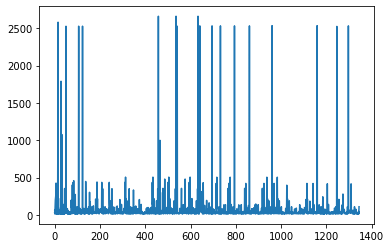

In [30]:
df.btc.plot()